In [196]:
%matplotlib notebook
import numpy as np
np.random.seed(13)

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

from sklearn.metrics import pairwise_distances

# importing all necessary modules 
import numpy as np

import warnings 
import pandas as pd

#Build the corpus vocabulary
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

In [28]:
class var2vec:
    variants = []
    snips = []
    embedding = 100
    
    vocabulary = []
    
    def __init__(self, data, rs):
        self.variants = data
        self.snips = rs
        precious_data = []
        corpus = ''
        vocabulary = {}
        rs = []

        
        for i in range(0,len(data)):
            values = data[i][1:]
            values_length = len(values)
            rs.append(data[i][0])
            precious_data.append(values)
            for j in range(0, values_length):
                #corpus += values[j]+' '
                self.vocabulary[values[j]] = i+j
            #corpus += '\n'

        #corpus
        #len(precious_data)
        precious_data
        self.vocabulary = list(vocabulary.keys())
        #rs
    
    def dataframe(self):
        import pandas as pd
        # Pandas dataframe all data
        df = pd.DataFrame(self.variants, self.snips)
        return df
        
        
        
        
        
model = var2vec([12, 1], ['rs11', 'rs22'])
model.variants
model.dataframe()

TypeError: 'int' object is not subscriptable

In [197]:
#Read VEP results file
corpus = open('data/chromosomes/chr22/chr22.fasta').readlines()[:15000]

In [198]:
#Get Columns Name
columns = list()
extra_columns = list()

columns = corpus[96].strip().split('\t')

for extra in corpus[38:96]:
    extra_columns.append( extra.split(':')[0].split('## ')[1].strip() )

print(extra_columns)
print('\n')
print(columns)
print(len(columns))

['DISTANCE', 'STRAND', 'FLAGS', 'VARIANT_CLASS', 'SYMBOL', 'SYMBOL_SOURCE', 'HGNC_ID', 'BIOTYPE', 'CANONICAL', 'TSL', 'APPRIS', 'CCDS', 'ENSP', 'SWISSPROT', 'TREMBL', 'UNIPARC', 'REFSEQ_MATCH', 'SOURCE', 'GIVEN_REF', 'USED_REF', 'BAM_EDIT', 'GENE_PHENO', 'SIFT', 'PolyPhen', 'EXON', 'INTRON', 'DOMAINS', 'miRNA', 'HGVSc', 'HGVSp', 'HGVS_OFFSET', 'AF', 'AFR_AF', 'AMR_AF', 'EAS_AF', 'EUR_AF', 'SAS_AF', 'AA_AF', 'EA_AF', 'gnomAD_AF', 'gnomAD_AFR_AF', 'gnomAD_AMR_AF', 'gnomAD_ASJ_AF', 'gnomAD_EAS_AF', 'gnomAD_FIN_AF', 'gnomAD_NFE_AF', 'gnomAD_OTH_AF', 'gnomAD_SAS_AF', 'MAX_AF', 'MAX_AF_POPS', 'CLIN_SIG', 'SOMATIC', 'PHENO', 'PUBMED', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE']


['#Uploaded_variation', 'Location', 'Allele', 'Gene', 'Feature', 'Feature_type', 'Consequence', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation', 'Extra']
14


In [199]:
#Get Variant data
raw_data = corpus[97:]

two_dim_data = list()
for line in corpus[97:]:
    two_dim_data.append(line.split('\t'))

my_precious_data = list()
chromosomes = list()
extras = list()
for line in two_dim_data:
    chromosomes.append( 'chr:'+str( line[1].split(':')[0] ) )
    my_precious_data.append( [ 'chr:'+str(line[1].split(':')[0]), line[0], line[1], line[2], line[3], line[13].strip().split(';')] )
    extras.append(line[13].strip().split(';'))
#print(chromosomes)
print(my_precious_data[:5])

[['chr:22', 'rs9617549', '22:10874444', 'T', '-', ['IMPACT=MODIFIER', 'VARIANT_CLASS=SNV', 'AFR_AF=0.3359', 'AMR_AF=0.111', 'EAS_AF=0.1419', 'EUR_AF=0.165', 'SAS_AF=0.1544', 'MAX_AF=0.3359', 'MAX_AF_POPS=AFR']], ['chr:22', 'rs5747224', '22:11122151', 'A', 'ENSG00000226444', ['IMPACT=MODIFIER', 'DISTANCE=2186', 'STRAND=1', 'VARIANT_CLASS=SNV', 'SYMBOL=ACTR3BP6', 'SYMBOL_SOURCE=HGNC', 'HGNC_ID=HGNC:38683', 'BIOTYPE=processed_pseudogene', 'CANONICAL=YES', 'SOURCE=Ensembl', 'GIVEN_REF=G', 'USED_REF=G', 'AF=0.2712', 'AFR_AF=0.2867', 'AMR_AF=0.2651', 'EAS_AF=0.4395', 'EUR_AF=0.173', 'SAS_AF=0.182', 'MAX_AF=0.4395', 'MAX_AF_POPS=EAS']], ['chr:22', 'rs2456393', '22:11122417', 'T', 'ENSG00000226444', ['IMPACT=MODIFIER', 'DISTANCE=1920', 'STRAND=1', 'VARIANT_CLASS=SNV', 'SYMBOL=ACTR3BP6', 'SYMBOL_SOURCE=HGNC', 'HGNC_ID=HGNC:38683', 'BIOTYPE=processed_pseudogene', 'CANONICAL=YES', 'SOURCE=Ensembl', 'GIVEN_REF=G', 'USED_REF=G', 'AF=0.2712', 'AFR_AF=0.2867', 'AMR_AF=0.2651', 'EAS_AF=0.4395', 'EUR_A

In [200]:
chromosomes = None
my_precious_data = None

In [201]:
# Pandas dataframe all data
df = pd.DataFrame(two_dim_data,
 chromosomes,
 columns=columns)

df.iloc[:30]

,#Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,Extra
0,rs9617549,22:10874444,T,-,-,-,intergenic_variant,-,-,-,-,-,rs9617549,IMPACT=MODIFIER;VARIANT_CLASS=SNV;AFR_AF=0.335...
1,rs5747224,22:11122151,A,ENSG00000226444,ENST00000422332,Transcript,upstream_gene_variant,-,-,-,-,-,rs5747224,IMPACT=MODIFIER;DISTANCE=2186;STRAND=1;VARIANT...
2,rs2456393,22:11122417,T,ENSG00000226444,ENST00000422332,Transcript,upstream_gene_variant,-,-,-,-,-,rs2456393,IMPACT=MODIFIER;DISTANCE=1920;STRAND=1;VARIANT...
3,rs199668908,22:11123683,C,ENSG00000226444,ENST00000422332,Transcript,upstream_gene_variant,-,-,-,-,-,rs199668908,IMPACT=MODIFIER;DISTANCE=654;STRAND=1;VARIANT_...
4,rs4010319,22:11123736,T,ENSG00000226444,ENST00000422332,Transcript,upstream_gene_variant,-,-,-,-,-,rs4010319,IMPACT=MODIFIER;DISTANCE=601;STRAND=1;VARIANT_...
5,rs4645075,22:11124625,T,ENSG00000226444,ENST00000422332,Transcript,non_coding_transcript_exon_variant,161,-,-,-,-,rs4645075,IMPACT=MODIFIER;STRAND=1;VARIANT_CLASS=SNV;SYM...
6,rs201436520,22:11125238,C,ENSG00000226444,ENST00000422332,Transcript,non_coding_transcript_exon_variant,774,-,-,-,-,rs201436520,IMPACT=MODIFIER;STRAND=1;VARIANT_CLASS=SNV;SYM...
7,rs199674018,22:11125296,T,ENSG00000226444,ENST00000422332,Transcript,non_coding_transcript_exon_variant,832,-,-,-,-,rs199674018,IMPACT=MODIFIER;STRAND=1;VARIANT_CLASS=SNV;SYM...
8,rs201821925,22:11125438,C,ENSG00000226444,ENST00000422332,Transcript,non_coding_transcript_exon_variant,974,-,-,-,-,rs201821925,IMPACT=MODIFIER;STRAND=1;VARIANT_CLASS=SNV;SYM...
9,rs9283198,22:12194456,C,-,-,-,intergenic_variant,-,-,-,-,-,rs9283198,IMPACT=MODIFIER;VARIANT_CLASS=SNV\n


In [202]:
# Pandas Dataframe extra data
print( len(extras[0]) )
print( len(extra_columns) )

df = pd.DataFrame(extras)
df.iloc[0].values

9
58


array(['IMPACT=MODIFIER', 'VARIANT_CLASS=SNV', 'AFR_AF=0.3359',
       'AMR_AF=0.111', 'EAS_AF=0.1419', 'EUR_AF=0.165', 'SAS_AF=0.1544',
       'MAX_AF=0.3359', 'MAX_AF_POPS=AFR', None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None], dtype=object)

In [287]:
def rsAF(af):
    af = float(af.split('=')[1])
    
    if(af < 0.001):
        return 'AF=0'
    elif(af < 0.01):
        return 'AF=1'
    elif(af < 0.5):
        return 'AF=2'
    elif(af < 1):
        return 'AF=3'
    else:
        return 'AF=4'

rsAF('AF=1.0')

'AF=4'

In [288]:
### From Original Data ###
# 

### From EXTRAS ###
# SYMBOL_SOURCE==HGNC - [4]

data = list()
rs = list()
str_data = ''

for i in range(0, len(two_dim_data)):
    try:
        af = [a for a in extras[i] if ('AF=' in a) and ('_AF=' not in  a) ]
        given_ref = [ref for ref in extras[i] if 'GIVEN_REF=' in ref][0]
        if(extras[i][4] == 'SYMBOL_SOURCE=HGNC'):
            if( 'downstream_gene_variant' in two_dim_data[i][6] or 'intron_variant' in two_dim_data[i][6] ):
                #if( 'AF=' in extras[i][12] ):
                if(len(af) == 1):
                    if ( len(extras[i][8].split('=')[1]) ):
                        #print('{}: Consequence: {} ALLELE: {}\n\t -EXTRAS: {} || {} || {} \n'.format(two_dim_data[i][0], two_dim_data[i][6], two_dim_data[i][2], extras[i][4], extras[i][12], extras[i][8] ))
                        #data.append( ''+two_dim_data[i][0]+', '+ two_dim_data[i][6]+', '+ two_dim_data[i][2]+', '+ extras[i][4]+', '+ extras[i][12]+', '+ extras[i][8]+'' )
                        #data.append( ''+two_dim_data[i][0]+', '+ two_dim_data[i][6]+', '+ two_dim_data[i][2]+', '+ extras[i][12]+', '+ extras[i][8]+'' )
                        #data.append( ''+two_dim_data[i][0]+', '+ two_dim_data[i][6]+', '+ two_dim_data[i][2]+', '+ af[0] +', '+ extras[i][8] +'' )
                        
                        #rs.append(two_dim_data[i][0])
                        #data.append( [two_dim_data[i][0], two_dim_data[i][6], two_dim_data[i][2], af[0], extras[i][8], given_ref ] )
                        if (len(two_dim_data[i][1])>2 ):
                            data.append( [two_dim_data[i][0], two_dim_data[i][1].split(':')[0], two_dim_data[i][2], two_dim_data[i][3], two_dim_data[i][4],two_dim_data[i][6], two_dim_data[i][2], rsAF(af[0]), extras[i][8], given_ref ] )
    except Exception:
        pass  # or you could use 'continue'

#myList = ','.join(map(str, data)) 
print(len(data[0]))

df = pd.DataFrame(data)

df.iloc[:30]
#df.tail()

#df[df[0].isin(['rs5746976', 'rs531711223'])]

10


,0,1,2,3,4,5,6,7,8,9
0,rs562138345,22,G,ENSG00000184624,ENST00000425869,"intron_variant,non_coding_transcript_variant",G,AF=1,SOURCE=Ensembl,GIVEN_REF=A
1,rs551006595,22,C,ENSG00000184624,ENST00000425869,"intron_variant,non_coding_transcript_variant",C,AF=3,SOURCE=Ensembl,GIVEN_REF=G
2,rs565996956,22,T,ENSG00000184624,ENST00000425869,"intron_variant,non_coding_transcript_variant",T,AF=3,SOURCE=Ensembl,GIVEN_REF=A
3,rs529053368,22,C,ENSG00000184624,ENST00000425869,"intron_variant,non_coding_transcript_variant",C,AF=3,SOURCE=Ensembl,GIVEN_REF=G
4,rs527958048,22,A,ENSG00000184624,ENST00000425869,"intron_variant,non_coding_transcript_variant",A,AF=1,SOURCE=Ensembl,GIVEN_REF=G
5,rs556340693,22,A,ENSG00000184624,ENST00000425869,"intron_variant,non_coding_transcript_variant",A,AF=1,SOURCE=Ensembl,GIVEN_REF=C
6,rs544434654,22,T,ENSG00000184624,ENST00000425869,"intron_variant,non_coding_transcript_variant",T,AF=0,SOURCE=Ensembl,GIVEN_REF=C
7,rs5771549,22,T,ENSG00000184624,ENST00000425869,"intron_variant,non_coding_transcript_variant",T,AF=2,SOURCE=Ensembl,GIVEN_REF=G
8,rs4911764,22,G,ENSG00000184624,ENST00000425869,"intron_variant,non_coding_transcript_variant",G,AF=2,SOURCE=Ensembl,GIVEN_REF=T
9,rs575370213,22,A,ENSG00000184624,ENST00000425869,"intron_variant,non_coding_transcript_variant",A,AF=1,SOURCE=Ensembl,GIVEN_REF=G


In [289]:
precious_data = []
corpus = ''
vocabulary = {}
rs = []

for i in range(0,len(data)):
    values = data[i][1:]
    values_length = len(values)
    rs.append(data[i][0])
    precious_data.append(values)
    for j in range(0, values_length):
        #corpus += values[j]+' '
        vocabulary[values[j]] = i+j
    #corpus += '\n'
    
#corpus
#len(precious_data)
precious_data
vocabulary = list(vocabulary.keys())
#rs

In [290]:
word2id = {v:k for k,v in enumerate(vocabulary)}
print(word2id)

id2word = {v:k for k, v in word2id.items()}

wids = []
for expression in precious_data:
    temp = []
    print(expression)
    for word in expression:
        temp.append(word2id[word])
    wids.append(temp)
    print(temp)

#wids = [[ print(word2id[w]) for w in word] for word in data2 ]
#print('\n\n\nWIDS--->', wids)
print('Word with id (19):',id2word[51])
print('---------------')
#pdata = sequence.pad_sequences(word2index, maxlen=5)

vocab_size = len(rs)
embed_size = 100
window_size = len(wids[0])

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:3])
print('Windows Size', window_size)

{'22': 0, 'G': 1, 'ENSG00000184624': 2, 'ENST00000425869': 3, 'intron_variant,non_coding_transcript_variant': 4, 'AF=1': 5, 'SOURCE=Ensembl': 6, 'GIVEN_REF=A': 7, 'C': 8, 'AF=3': 9, 'GIVEN_REF=G': 10, 'T': 11, 'A': 12, 'GIVEN_REF=C': 13, 'AF=0': 14, 'AF=2': 15, 'GIVEN_REF=T': 16, 'ENSG00000236831': 17, 'ENST00000429435': 18, 'ENSG00000235759': 19, 'ENST00000443989': 20, 'ENSG00000224435': 21, 'ENST00000426025': 22, 'ENSG00000234381': 23, 'ENST00000435410': 24, 'ENSG00000198062': 25, 'ENST00000621704': 26, 'intron_variant': 27, 'APPRIS=A2': 28, 'ENST00000343518': 29, 'TSL=5': 30, 'ENSG00000236666': 31, 'ENST00000422014': 32, 'TSL=1': 33, '-': 34, 'GIVEN_REF=TT': 35, 'ENSG00000206195': 36, 'ENST00000383038': 37, 'ENST00000413768': 38, 'ENST00000437781': 39, 'ENST00000447898': 40, 'ENST00000458623': 41, 'ENSG00000232775': 42, 'ENST00000440946': 43, 'ENST00000609679': 44, 'ENSG00000223875': 45, 'ENST00000420638': 46, 'ENSG00000225293': 47, 'ENST00000399687': 48, 'ENSG00000229658': 49, 'ENS

['22', 'T', 'ENSG00000227367', 'ENST00000421957', 'intron_variant,non_coding_transcript_variant', 'T', 'AF=1', 'SOURCE=Ensembl', 'GIVEN_REF=C']
[0, 11, 51, 52, 4, 11, 5, 6, 13]
['22', 'A', 'ENSG00000227367', 'ENST00000421957', 'intron_variant,non_coding_transcript_variant', 'A', 'AF=2', 'SOURCE=Ensembl', 'GIVEN_REF=G']
[0, 12, 51, 52, 4, 12, 15, 6, 10]
['22', 'T', 'ENSG00000227367', 'ENST00000421957', 'intron_variant,non_coding_transcript_variant', 'T', 'AF=2', 'SOURCE=Ensembl', 'GIVEN_REF=C']
[0, 11, 51, 52, 4, 11, 15, 6, 13]
['22', 'A', 'ENSG00000227367', 'ENST00000421957', 'intron_variant,non_coding_transcript_variant', 'A', 'AF=1', 'SOURCE=Ensembl', 'GIVEN_REF=C']
[0, 12, 51, 52, 4, 12, 5, 6, 13]
['22', '-', 'ENSG00000227367', 'ENST00000421957', 'intron_variant,non_coding_transcript_variant', '-', 'AF=2', 'SOURCE=Ensembl', 'GIVEN_REF=ACAA']
[0, 34, 51, 52, 4, 34, 15, 6, 59]
['22', 'C', 'ENSG00000227367', 'ENST00000421957', 'intron_variant,non_coding_transcript_variant', 'C', 'AF=2'

In [206]:
len(word2id.keys())

406

In [291]:
#print('-----my_Wid-----\n',my_wid)
#print('-----my_Word2Id-----\n',my_word2id)
#print('-----my_id2word-----\n', my_id2word.items())
print('ID2WORD[n]:',id2word[62])

#rs = np.array(rs)

def generate_data():
    #wids2 = list()
    total = len(rs)

    for i in range(0, total):
        x = np.array(  [ wids[i] ]  )
        #print( np_utils.to_categorical( i, len(rs)) )
        y = np.array( [ np_utils.to_categorical(i, len(rs)) ]  )
        
        yield x, y
    

# Test this out for some samples
i = 0
for x, y in generate_data():
        print(x.shape)
        print(y.shape)
        #print('Context (X):', x, '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
        print('Context (X):', x, '-> Target (Y):', rs[np.argwhere(y[0])[0][0]] )
        
        #if i == 2:
            ##break
        i += 1

ID2WORD[n]: GIVEN_REF=AACAAC
(1, 9)
(1, 1306)
Context (X): [[0 1 2 3 4 1 5 6 7]] -> Target (Y): rs562138345
(1, 9)
(1, 1306)
Context (X): [[ 0  8  2  3  4  8  9  6 10]] -> Target (Y): rs551006595
(1, 9)
(1, 1306)
Context (X): [[ 0 11  2  3  4 11  9  6  7]] -> Target (Y): rs565996956
(1, 9)
(1, 1306)
Context (X): [[ 0  8  2  3  4  8  9  6 10]] -> Target (Y): rs529053368
(1, 9)
(1, 1306)
Context (X): [[ 0 12  2  3  4 12  5  6 10]] -> Target (Y): rs527958048
(1, 9)
(1, 1306)
Context (X): [[ 0 12  2  3  4 12  5  6 13]] -> Target (Y): rs556340693
(1, 9)
(1, 1306)
Context (X): [[ 0 11  2  3  4 11 14  6 13]] -> Target (Y): rs544434654
(1, 9)
(1, 1306)
Context (X): [[ 0 11  2  3  4 11 15  6 10]] -> Target (Y): rs5771549
(1, 9)
(1, 1306)
Context (X): [[ 0  1  2  3  4  1 15  6 16]] -> Target (Y): rs4911764
(1, 9)
(1, 1306)
Context (X): [[ 0 12  2  3  4 12  5  6 10]] -> Target (Y): rs575370213
(1, 9)
(1, 1306)
Context (X): [[ 0  8  2  3  4  8  9  6 10]] -> Target (Y): rs533246312
(1, 9)
(1, 1306)

Context (X): [[ 0  8 45 46  4  8 14  6 16]] -> Target (Y): rs558789462
(1, 9)
(1, 1306)
Context (X): [[ 0 11 45 46  4 11  9  6  7]] -> Target (Y): rs538733846
(1, 9)
(1, 1306)
Context (X): [[ 0 11 45 46  4 11  9  6  7]] -> Target (Y): rs534397162
(1, 9)
(1, 1306)
Context (X): [[ 0 11 45 46  4 11  9  6  7]] -> Target (Y): rs573623119
(1, 9)
(1, 1306)
Context (X): [[ 0  8 45 46  4  8 15  6 10]] -> Target (Y): rs1925984
(1, 9)
(1, 1306)
Context (X): [[ 0 12 45 46  4 12  9  6 16]] -> Target (Y): rs9604649
(1, 9)
(1, 1306)
Context (X): [[ 0 11 45 46  4 11  9  6  7]] -> Target (Y): rs548850790
(1, 9)
(1, 1306)
Context (X): [[ 0 12 45 46  4 12  9  6 16]] -> Target (Y): rs2844879
(1, 9)
(1, 1306)
Context (X): [[ 0 12 47 48  4 12 14  6 10]] -> Target (Y): rs535897521
(1, 9)
(1, 1306)
Context (X): [[ 0 11 47 48  4 11  5  6 13]] -> Target (Y): rs574146565
(1, 9)
(1, 1306)
Context (X): [[ 0 11 47 48  4 11  5  6 10]] -> Target (Y): rs553371437
(1, 9)
(1, 1306)
Context (X): [[ 0 11 47 48  4 11  5  6

Context (X): [[ 0  1 51 52  4  1 15  6  7]] -> Target (Y): rs541371757
(1, 9)
(1, 1306)
Context (X): [[ 0 11 51 52  4 11 15  6 13]] -> Target (Y): rs12162737
(1, 9)
(1, 1306)
Context (X): [[ 0 11 51 52  4 11  5  6 13]] -> Target (Y): rs192991994
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  5  6 10]] -> Target (Y): rs534517322
(1, 9)
(1, 1306)
Context (X): [[ 0  1 51 52  4  1  5  6 16]] -> Target (Y): rs553346926
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  5  6 16]] -> Target (Y): rs571577011
(1, 9)
(1, 1306)
Context (X): [[ 0 11 51 52  4 11  5  6 13]] -> Target (Y): rs369442593
(1, 9)
(1, 1306)
Context (X): [[ 0 11 51 52  4 11  5  6 10]] -> Target (Y): rs574215447
(1, 9)
(1, 1306)
Context (X): [[ 0  8 51 52  4  8  5  6 16]] -> Target (Y): rs541233856
(1, 9)
(1, 1306)
Context (X): [[ 0  8 51 52  4  8  5  6 16]] -> Target (Y): rs559474141
(1, 9)
(1, 1306)
Context (X): [[ 0 11 51 52  4 11  5  6 13]] -> Target (Y): rs530792548
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12 

(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  5  6 10]] -> Target (Y): rs564038131
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12 14  6 13]] -> Target (Y): rs544844495
(1, 9)
(1, 1306)
Context (X): [[ 0  1 51 52  4  1 15  6 13]] -> Target (Y): rs79740603
(1, 9)
(1, 1306)
Context (X): [[ 0 11 51 52  4 11  5  6 10]] -> Target (Y): rs552503641
(1, 9)
(1, 1306)
Context (X): [[ 0  1 51 52  4  1 14  6 16]] -> Target (Y): rs570625727
(1, 9)
(1, 1306)
Context (X): [[ 0 34 51 52  4 34  5  6 58]] -> Target (Y): rs368331326
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  5  6 10]] -> Target (Y): rs112602288
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  9  6 10]] -> Target (Y): rs2096676
(1, 9)
(1, 1306)
Context (X): [[ 0  1 51 52  4  1  5  6  7]] -> Target (Y): rs147014429
(1, 9)
(1, 1306)
Context (X): [[ 0  8 51 52  4  8  5  6 16]] -> Target (Y): rs553777377
(1, 9)
(1, 1306)
Context (X): [[ 0  8 51 52  4  8  5  6 16]] -> Target (Y): rs572255255
(1, 9)
(1, 1306)
Context (X): [[ 0 

Context (X): [[ 0  8 51 52  4  8 15  6  7]] -> Target (Y): rs2379913
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  5  6 13]] -> Target (Y): rs568708809
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12 15  6 10]] -> Target (Y): rs566730280
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  5  6 10]] -> Target (Y): rs533569819
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  5  6 54]] -> Target (Y): rs539779619
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12 15  6 10]] -> Target (Y): rs200293201
(1, 9)
(1, 1306)
Context (X): [[ 0 11 51 52  4 11  5  6 13]] -> Target (Y): rs544290125
(1, 9)
(1, 1306)
Context (X): [[ 0  8 51 52  4  8 14  6 16]] -> Target (Y): rs555937080
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12 15  6 10]] -> Target (Y): rs373609416
(1, 9)
(1, 1306)
Context (X): [[ 0 34 51 52  4 34  5  6 16]] -> Target (Y): rs572933024
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  5  6 10]] -> Target (Y): rs367707823
(1, 9)
(1, 1306)
Context (X): [[ 0 34 51 52  4 34 1

Context (X): [[ 0 12 51 52  4 12 14  6 13]] -> Target (Y): rs28860468
(1, 9)
(1, 1306)
Context (X): [[ 0  1 51 52  4  1  5  6 16]] -> Target (Y): rs562678833
(1, 9)
(1, 1306)
Context (X): [[ 0  8 51 52  4  8  5  6 16]] -> Target (Y): rs542097359
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  5  6 10]] -> Target (Y): rs552321592
(1, 9)
(1, 1306)
Context (X): [[ 0  8 51 52  4  8 15  6 16]] -> Target (Y): rs200509141
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  5  6 13]] -> Target (Y): rs536551992
(1, 9)
(1, 1306)
Context (X): [[ 0 11 51 52  4 11 14  6  7]] -> Target (Y): rs533907978
(1, 9)
(1, 1306)
Context (X): [[ 0  1 51 52  4  1  5  6  7]] -> Target (Y): rs577256607
(1, 9)
(1, 1306)
Context (X): [[ 0 11 51 52  4 11 15  6 13]] -> Target (Y): rs368936518
(1, 9)
(1, 1306)
Context (X): [[ 0 11 51 52  4 11 15  6 13]] -> Target (Y): rs201768150
(1, 9)
(1, 1306)
Context (X): [[ 0 12 51 52  4 12  5  6 54]] -> Target (Y): rs572819645
(1, 9)
(1, 1306)
Context (X): [[ 0 34 51 52  4 34 

In [292]:
#!pip install pydot
#!pip install graphviz 
#!pip install pydotplus
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size ))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 9, 100)            130600    
_________________________________________________________________
lambda_5 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1306)              131906    
Total params: 262,506
Trainable params: 262,506
Non-trainable params: 0
_________________________________________________________________
None


In [293]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_data():
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 1 	Loss: 9434.647688865662

Epoch: 2 	Loss: 9325.923707485199

Epoch: 3 	Loss: 9091.812644958496

Epoch: 4 	Loss: 8767.330663204193

Epoch: 5 	Loss: 8392.179838180542



In [399]:
import pandas as pd
weights = cbow.get_weights()[0]
#weights = weights[1:]
print(weights.shape)

#df = pd.DataFrame(weights)
df = pd.DataFrame(weights, index=list(rs))
#df = df.iloc[:vocab_size-2]

#print(df.loc['rs555563486'])
#print(df.loc['rs545181219'])
wv = pd.DataFrame(weights, index=list(rs))
#wv.loc['rs555563486'].values[0]

(1306, 100)


In [295]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [rs[idx] for idx in distance_matrix[rs.index(search_term)].argsort()[1:6]+1] 
                   for search_term in ['rs562138345', 'rs117836313', 'rs531323657', 'rs549847104']}

print(similar_words)

(1306, 1306)
{'rs562138345': ['rs544434654', 'rs556340693', 'rs564329052', 'rs5771549', 'rs4911764'], 'rs117836313': ['rs572391575', 'rs2845211', 'rs201976834', 'rs576147240', 'rs545181219'], 'rs531323657': ['rs184303362', 'rs131532', 'rs572255255', 'rs563266357', 'rs5994151'], 'rs549847104': ['rs131526', 'rs571619270', 'rs567808534', 'rs567796709', 'rs131534']}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [300]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [rs[idx] for idx in distance_matrix[rs.index(search_term)].argsort()[1:6]+1] 
                   for search_term in ['rs562138345', 'rs117836313', 'rs531323657', 'rs549847104']}

print(similar_words)

#distance_matrix[rs.index('rs549847104')].argsort()[:3]+1  #Id of 3 first rs
#distance_matrix[rs.index('rs549847104') ]

#print( distance_matrix[ rs.index('rs562138345') ] )
#print( distance_matrix[rs.index('rs549847104')].argsort()[:3]+1)

def find_similar_words(word, output=6):
    similar_words = {search_term: [rs[idx] for idx in distance_matrix[rs.index(search_term)].argsort()[1:output]+1] 
                       for search_term in [word]}
    return list(similar_words.values())[0]
    
print( find_similar_words('rs562138345', output=5 ) )
print('\n')

def find_similar_words_tuple(word, output=6):
    similar_words = {search_term: [(rs[idx], distance_matrix[rs.index(search_term)][idx]) for idx in distance_matrix[rs.index(search_term)].argsort()[1:output]+1] 
                       for search_term in [word]}
    return list(similar_words.values())[0]

print( find_similar_words_tuple('rs562138345', output=5 ) )

(1306, 1306)
{'rs562138345': ['rs544434654', 'rs556340693', 'rs564329052', 'rs5771549', 'rs4911764'], 'rs117836313': ['rs572391575', 'rs2845211', 'rs201976834', 'rs576147240', 'rs545181219'], 'rs531323657': ['rs184303362', 'rs131532', 'rs572255255', 'rs563266357', 'rs5994151'], 'rs549847104': ['rs131526', 'rs571619270', 'rs567808534', 'rs567796709', 'rs131534']}
['rs544434654', 'rs556340693', 'rs564329052', 'rs5771549']


[('rs544434654', 1.4703295), ('rs556340693', 1.1962813), ('rs564329052', 1.8164971), ('rs5771549', 1.5615443)]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [297]:
from itertools import combinations

min((abs(words_similarity(x,y)), x, y) for x,y in combinations(rs, 2))

(2.167555948062727e-07, 'rs117205378', 'rs565508803')

In [219]:
a = [1,2,3,4]
min([(x+y, x, y) for x,y in combinations(a,2)])

(3, 1, 2)

In [298]:
min((11,1,3),(11,2,3))

(11, 1, 3)

In [427]:
from scipy import spatial


def words_similarity(word1, word2):
    return 1 - spatial.distance.cosine(weights[ rs.index(word1) ], weights[ rs.index(word2) ])

words_similarity('rs146908746', 'rs527958048')

print(words_similarity('rs117205378', 'rs565508803'))

'''
for x in similar_words.keys():
    print('-------',x,'------')
    for y in similar_words[x]:
        print(y,': ', words_similarity(x, y) )
''' 
    

import operator

def spartial_distance(word, output=6):
    spartial = []
    for x in rs:
        if (x is not word):
            similarity = words_similarity(word,x)
            spartial.append( (x, abs(similarity) ) )
    #spartial = np.array(spartial)
    spartial.sort(key=operator.itemgetter(1))
    return spartial[:output]

#word = 'rs117205378'


spartial_distance('rs117205378', 6)

-2.167555948062727e-07


[('rs565508803', 2.167555948062727e-07),
 ('rs549161543', 0.00012422796862665564),
 ('rs536132167', 0.00016602924733888358),
 ('rs148757124', 0.0002554483653511852),
 ('rs34747326', 0.0003921384923160076),
 ('rs536919987', 0.0007485562236979604)]

<IPython.core.display.Javascript object>


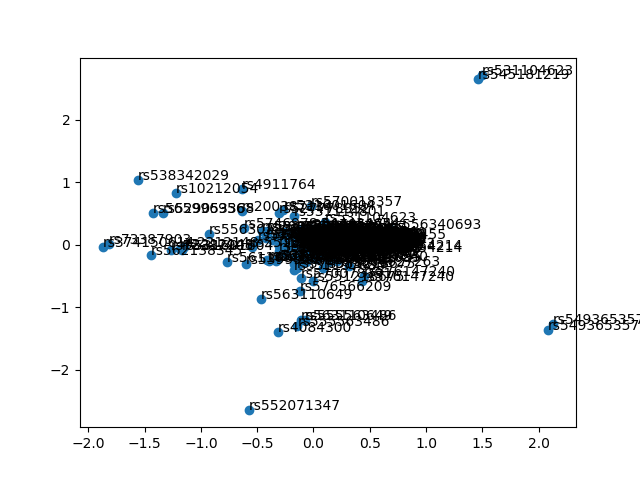

--> Word: rs562138345 - Data: ['22', 'G', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_coding_transcript_variant', 'G', 'AF=0.0010', 'SOURCE=Ensembl', 'GIVEN_REF=A'] - XY: -1.4478564909729748, -0.1673597403090876
--> Word: rs551006595 - Data: ['22', 'C', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_coding_transcript_variant', 'C', 'AF=0.9994', 'SOURCE=Ensembl', 'GIVEN_REF=G'] - XY: -0.17444994470182934, -0.3034694942612355
--> Word: rs565996956 - Data: ['22', 'T', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_coding_transcript_variant', 'T', 'AF=0.9974', 'SOURCE=Ensembl', 'GIVEN_REF=A'] - XY: -1.4263232933686096, 0.5134909486321179
--> Word: rs529053368 - Data: ['22', 'C', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_coding_transcript_variant', 'C', 'AF=0.997', 'SOURCE=Ensembl', 'GIVEN_REF=G'] - XY: -1.335460461629334, 0.500003277483198
--> Word: rs527958048 - Data: ['22', 'A', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_

--> Word: rs8139958 - Data: ['22', 'T', 'ENSG00000227367', 'ENST00000421957', 'intron_variant,non_coding_transcript_variant', 'T', 'AF=0.0010', 'SOURCE=Ensembl', 'GIVEN_REF=G'] - XY: 0.03393700964253679, -0.04177964304195649
--> Word: rs78328400 - Data: ['22', 'A', 'ENSG00000227367', 'ENST00000421957', 'intron_variant,non_coding_transcript_variant', 'A', 'AF=0.0693', 'SOURCE=Ensembl', 'GIVEN_REF=G'] - XY: -0.00320455226083535, 0.01140937925929088
--> Word: rs560428503 - Data: ['22', 'T', 'ENSG00000227367', 'ENST00000421957', 'intron_variant,non_coding_transcript_variant', 'T', 'AF=0.0024', 'SOURCE=Ensembl', 'GIVEN_REF=A'] - XY: 0.02416212800557172, 0.00657263817539381
--> Word: rs181597116 - Data: ['22', 'A', 'ENSG00000227367', 'ENST00000421957', 'intron_variant,non_coding_transcript_variant', 'A', 'AF=0.0018', 'SOURCE=Ensembl', 'GIVEN_REF=G'] - XY: 0.035844564764472286, 0.0007665741373968043
--> Word: rs549918967 - Data: ['22', 'A', 'ENSG00000227367', 'ENST00000421957', 'intron_varian

In [61]:
# Import modules
from sklearn.decomposition import PCA
from matplotlib import pyplot

num_of_words = None   # Limit the pca words or type None

X = df.iloc[:num_of_words]
#print('---X--> {}'.format(X[:10]))

# PCA tranformation
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
pyplot.figure(1)
pyplot.scatter(result[:, 0], result[:, 1])
words = df.index
words = words[:num_of_words]
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    #print('--> Word: {} XY: {}, {}'.format(word, result[i, 0], result[i, 1]))   # prints the word and position
    print('--> Word: {} - Data: {} - XY: {}, {}'.format(word, precious_data[i], result[i, 0], result[i, 1]))
pyplot.show()

<IPython.core.display.Javascript object>


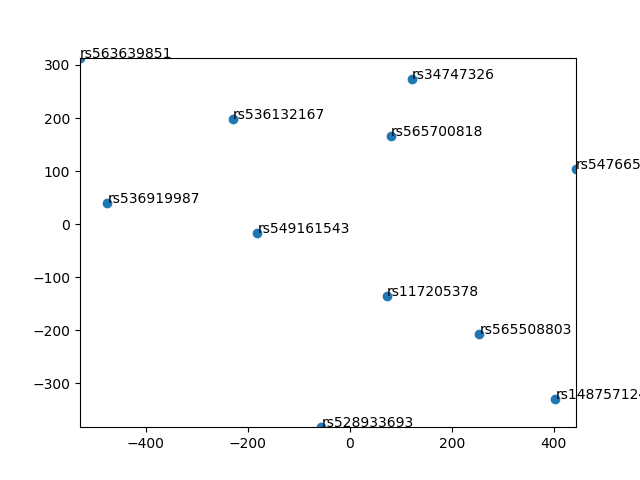

In [436]:
from sklearn.metrics import pairwise_distances
distances = distance_matrix

# Need the interactive Tools for Matplotlib

import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE


def display_closestwords_tsnescatterplot(model, word, output=6):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = spartial_distance(word, output)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([ model.get_weights()[0][rs.index(word)] ]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.get_weights()[0][rs.index(wrd_score[0])]
        #wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=3, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    

plt.figure(1)
display_closestwords_tsnescatterplot(cbow, 'rs117205378', 10)

In [342]:
import random

def alex_random_vector(n):
    return [0 if random.random()<0.5 else 1 for x in range(n)]

def alex_gen_X_Y(k, l):
    X = np.array([alex_random_vector(k)])
    Y = np.array([alex_random_vector(l)])
    
    return X,Y

def alex_gen_samples(M, k, l):
    for _ in range(M):
        yield alex_gen_X_Y(k, l)

def fake_output(M, components):
    return ([[(random.random()) for _ in range(components)] for _ in range(M)])

print ('FAKE INPUT:')
#list(alex_gen_samples(10, 5, 2))
for xx, yy in alex_gen_samples(10, 5, 2):
    print(xx.shape)
    print(yy.shape)
    print(xx, yy)

    

FAKE INPUT:
(1, 5)
(1, 2)
[[1 0 0 0 1]] [[0 1]]
(1, 5)
(1, 2)
[[0 1 1 1 1]] [[1 1]]
(1, 5)
(1, 2)
[[1 0 0 0 0]] [[1 1]]
(1, 5)
(1, 2)
[[0 1 0 1 0]] [[1 0]]
(1, 5)
(1, 2)
[[1 0 1 1 0]] [[0 0]]
(1, 5)
(1, 2)
[[0 1 0 0 1]] [[1 0]]
(1, 5)
(1, 2)
[[0 0 1 1 1]] [[1 0]]
(1, 5)
(1, 2)
[[0 1 1 0 1]] [[1 1]]
(1, 5)
(1, 2)
[[0 1 0 0 0]] [[1 0]]
(1, 5)
(1, 2)
[[1 0 0 1 1]] [[0 0]]


In [338]:
print ('FAKE OUTPUT:')
print (fake_output(10, 3))


FAKE OUTPUT:
[[0.03497567604348428, 0.8388099264110191, 0.03647666851167042], [0.44494732654606195, 0.9170356033212471, 0.022071058466419213], [0.5030372142768175, 0.4699412093701123, 0.13034246900198043], [0.29606660496926374, 0.5682840092167523, 0.2345384655164372], [0.9560458872133808, 0.4167876001021227, 0.3994482628868268], [0.3521744572747686, 0.19824766219640488, 0.43090860186829694], [0.2203057794628922, 0.14437603160820134, 0.7637168768187086], [0.8152256532370434, 0.5942856924724058, 0.5919246241844394], [0.8831054627114521, 0.2335236682562375, 0.3604486525901792], [0.3872134580805322, 0.5457957209768002, 0.4685409571480613]]


```
[([1, 0, 0, 1, 1], [0, 0]),---> DATAPOINT 1
 ([1, 0, 0, 0, 0], [1, 1]),---> DATAPOINT 2
 ([1, 0, 1, 0, 0], [1, 0]),---> ...
 ([0, 1, 0, 0, 1], [0, 0]),
 ([1, 0, 1, 1, 0], [1, 1]),
 ([1, 1, 1, 1, 1], [0, 1]),
 ([1, 1, 1, 0, 0], [0, 0]),
 ([0, 0, 0, 1, 1], [1, 0]),
 ([0, 0, 1, 1, 0], [1, 1]),
 ([1, 1, 0, 0, 0], [1, 0])] --> DATAPOINT 10

DATAPOINT 1:
X = [1, 0, 0, 1, 1]
Y= [0, 0]

DATAPOINT 2:
X = [1, 0, 0, 0, 0]
Y = [1, 1]

DATAPOINT 3:
....


FEED IN DNN...
(magick)
COMPONENTS = 3

RESULT
[
[0.1234]
[0,0.234,1]
[0,1,1]
[0,1,1]
[0,1,1]
[0,1,1]
[0,1,1]
[0,1,1]
[0,1,1]
]

```





In [339]:
examples = 10
x_elements = 5
y_elements = 2
alex_gen_samples(examples, x_elements, y_elements)

vector_space = 3

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=y_elements, output_dim=vector_space, input_length=x_elements ))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(vector_space,)))
cbow.add(Dense(y_elements, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_45 (Embedding)     (None, 5, 3)              6         
_________________________________________________________________
lambda_45 (Lambda)           (None, 3)                 0         
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 8         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
None


In [340]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in alex_gen_samples(examples, x_elements, y_elements):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()
    
    
    
import pandas as pd
weights = cbow.get_weights()[0]
#weights = weights[1:]
print(weights.shape)

df = pd.DataFrame(weights)
#df = pd.DataFrame(weights, index=list(id2word.values())[1:vocab_size])
#df = df.iloc[:vocab_size-2]
df

Epoch: 1 	Loss: 4.175231993198395

Epoch: 2 	Loss: 9.714963257312775

Epoch: 3 	Loss: 6.2269962430000305

Epoch: 4 	Loss: 8.270956635475159

Epoch: 5 	Loss: 9.104730546474457

(2, 3)


,0,1,2
0,0.037187,0.037925,0.009382
1,-0.003037,0.029935,-0.039194
